# SPACE X FALCON 9 ANALYSIS

![Falcon 9](../images/capa.PNG)

#### Introduction

The project delves into the feasibility of establishing a new player in the rocket industry, SpaceY, to rival SpaceX, the brainchild of billionaire industrialist Elon Musk. 

The primary focus involves assessing whether Space Y's rockets can emulate SpaceX's successful first stage recovery, a pivotal element in determining launch costs. This insight is crucial for potential competitors looking to bid against SpaceX for rocket launches.

Currently, SpaceX offers Falcon 9 rocket launches at a competitive cost of 62 million dollars, significantly lower than other providers whose prices soar upwards of 165 million dollars per launch. SpaceX's cost efficiency is attributed to its groundbreaking practice of reusing the first stage of its rockets.

The project utilizes advanced data science techniques to predict the likelihood of SpaceX reusing the first stage, a key factor in driving down launch costs. Additionally, it provides valuable insights into optimal launch locations, enhancing the overall strategic planning for potential entrants into the rocket launch market.


#### The results obtained demonstrated that:

* Launch sites are in close proximity to coastline so they can fly over the ocean during launch, for at least two safety reasons-- (1) crew has option to abort launch and attempt water landing (2) minimize people and property at risk from falling debris.
 
* Launch sites are in close proximity to highways, which allows for easily transport required people and property.
 
* Launch sites are in close proximity to railways, which allows transport for heavy cargo.
 
* Launch sites are in close proximity to equator to minimize fuel consumption by using Earth's ~ 30km/sec eastward spin to help spaceships get into orbit.
 
* Launch sites are not in close proximity to cities, which minimizes danger to population dense areas.
 
* After comparing accuracy of all methods used in the predictive analysis , it was conclused that, they all preformed practically the same, except for tree which fit train data slightly better but test data worse.


#### The methodology used implied:

**Data collection**: to predict if the Falcon 9 first stage will land successfully, if so, also determine the cost of a launch.
* Data was collected using the Webscraping and SpaceX  Rest API.

**Data wrangling**: to perform some EDA to find some patterns in the data and determine what would be the label for training supervised model.
* Data was processed by applying one-hot encoding to categorical features.

**Exploratory data analysis (EDA)**: to determine if the first stage will land, in order to determine the cost of a launch.
* EDA with visualization and SQL

**Interactive visual analytics**: to perform more interactive visualization tools.
* Folium and Plotly Dash

**Predictive analysis using classification models.**
* Decision trees, Logistic Regression, SVM and KNN

# 1. <code> **Data Collection From an API**. </code>

* The data was collected from SpaceX API, then it was returned in .JSON and finally saved into CSV format.
* The data was cleaned and the missing values treated.
* Used the get request to collect the data
* Used BeautfulSoup to webscrap Falcon 9 launches from Wikipedia

#### Objective:
* Request to the SpaceX API
* Clean the requested data

#### 11. Collecting the Data

In [33]:
import requests
import pandas as pd
import numpy as np
import datetime
#from datetime import datetime

In [3]:
# printing all collumns of a dataframe
pd.set_option('display.max_columns', None)

In [4]:
# printing all of the data in a feature
pd.set_option('display.max_colwidth', None)

Helper functions to use the API to extract information using identification numbers in the launch data.

* From the *rocket column* we would like to learn the booster name.

In [42]:
def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

From the **launchpad** we would like to know the name of:
* the launch
* site being used, 
* the logitude,
* the latitude.

In [45]:
# This function takes the dataset and uses the launchpad column to call 
# the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])

In [46]:
# This function takes the dataset and uses the payloads column to call 
# the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

From the **payload** I would like to learn:
* the mass of the payload 
* the orbit that it is going to.

From **cores** I would like to learn:
* the *outcome* of the landing, 
* the ***type*** of the landing, 
* ***number of flights*** with that core, 
     * whether ***gridfins*** were used, wheter the core is ***reused***, wheter ***legs*** were used, 
* the ***landing pad*** used, 
* the ***block*** of the core which is a number used to seperate version of cores, 
* the ***number of times*** this specific core has been reused, and 
* the serial of the core.

In [47]:
# This function takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

#### 1.2 Requesting rocket launch data from SpaceX API:

In [48]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [49]:
response = requests.get(spacex_url)

In [1]:
print(response.content)

![Image_url1](https://images2.imgbox.com/94/f2/NN6Ph45r_o.png)

In [3]:
from IPython.display import Image, display

image_url1 = 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png'


display(Image(url = image_url1))

In [4]:
from IPython.display import IFrame

video_url = 'https://www.youtube.com/embed/0a_00nJ_Y88?si=ggcelHZwMfTVzN5P?autoplay=1'

video_iframe = IFrame(video_url, width=560, height=315)

video_iframe

#### 1.3 Requesting and Parsing the SpaceX Launch Data

In [54]:
# I am using the static response object above to make the requested JSON results more consistent

static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)

In [55]:
response.status_code

200

In [56]:
# I am using json_normalize meethod to convert the json result into a dataframe
data = pd.json_normalize(response.json())

In [57]:
data.dtypes

static_fire_date_utc          object
static_fire_date_unix        float64
tbd                             bool
net                             bool
window                       float64
rocket                        object
success                         bool
details                       object
crew                          object
ships                         object
capsules                      object
payloads                      object
launchpad                     object
auto_update                     bool
failures                      object
flight_number                  int64
name                          object
date_utc                      object
date_unix                      int64
date_local                    object
date_precision                object
upcoming                        bool
cores                         object
id                            object
fairings.reused               object
fairings.recovery_attempt     object
fairings.recovered            object
f

In [58]:
data.head(5)

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,True,"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,True,[],4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_succes

<code>From the rows printed above, I can see that a lot of the data are IDs. For example the rocket column has no information about the rocket just an identification number.</code>

Now I will use the API again to get information about the launches using the IDs given for each launch. Specifically I'll be using columns **rocket**, **payloads**, **launchpad**, and **cores**.


* From the rocket ---> to learn the booster name

* From the payload ---> to learn the mass of the payload and the orbit that it is going to

* From the launchpad ---> to know the name of the launch site being used, the longitude, and the latitude.

* From cores ---> to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

In [59]:
# Taking a subset of the dataframe by keeping only the features I want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]


# Removing rows with multiple cores because those are falcon rockets with 2 extra rocket boosters 
# and removing rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]


# Since payloads and cores are lists of size 1 I am also extracting the single value in the list and replacing the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])


# Converting the date_utc to a datetime datatype and after that, extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date


# Using the date I'll restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]


***Note***: the data from these requests will be stored in lists and will be used to create a new dataframe.

In [60]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

***Note***: these functions will apply the outputs globally to the above variables.

In [61]:
# Call getBoosterVersion
getBoosterVersion(data)

In [62]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [63]:
# Call getLaunchSite
getLaunchSite(data)

In [64]:
# Call getPayloadData
getPayloadData(data)

In [65]:
# Call getCoreData
getCoreData(data)

#### 1.4 Constructing a dataset using the obtained data combining the columns into a dictionary.

In [66]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [67]:
# Creating a data from launch_dict
data2 = pd.DataFrame(launch_dict)

data2.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


#### 1.5 Filtering the dataframe using the BoosterVersion column to only keep Falcon 9 launches

In [68]:
data_falcon9 = data2[data2['BoosterVersion']!='Falcon 1']

In [69]:
# reseting the FlgihtNumber column
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


#### 1.6 Data Wrangling

In [70]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

***Note***: We can see above that some of the rows are missing values in the dataset.

Before I can continue I will deal with these missing values. The **LandingPad** column will retain None values to represent when landing pads were not used.

#### 1.7 Dealing with Missing Values

In [ ]:
# Calculate the mean value of PayloadMass column
payload_mean = data_falcon9['PayloadMass'].mean()

# Replace the np.nan values with its mean value
data_falcon9['PayloadMass'].fillna(payload_mean, inplace=True)


In [72]:
data_falcon9.to_csv('dataset_part_1.csv', index=False)

# 2. <code> **Data Wrangling**. </code>

* Done the Exploratory data analysis 
    * 0 or 1 as a dummy variables where 1 indicates the successful and 0 indicates the unsuccessful
* Determined the training labels, calculated the number of launches at each site, the number and occurrence of each orbits 
* Created a landing outcome label from outcome column. 
* Exported the results to csv file.

### Objective:
* Perform Exploratory Data Analysis (EDA)
* Determine Training Labels.

### Scenario:
* In the data set, there are several different cases where the booster did not land successfully. 
* Sometimes a landing was attempted but failed due to an accident.
* In this lab I will mainly convert those outcomes into Training Labels with **1** means the booster successfully landed **0** means it was unsuccessful.

![Space X](https://camo.githubusercontent.com/a0184ea6ee7174857c755b964345c82ec9556f17e74fd5f6a49b5937711fd60f/68747470733a2f2f63662d636f75727365732d646174612e73332e75732e636c6f75642d6f626a6563742d73746f726167652e617070646f6d61696e2e636c6f75642f49424d446576656c6f706572536b696c6c734e6574776f726b2d445330373031454e2d536b696c6c734e6574776f726b2f6170692f496d616765732f6c616e64696e675f312e676966 "Falcon 9 first stage will land successfully")



#### 2.1. Data Analysis

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('csv/dataset_part_1.csv')
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [ ]:
# Identifying and calculating the percentage of the missing values in each attribute
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

In [ ]:
# Identifying numerical and categorical columns:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

#### 2.2.  Number of launches on each site

#### Space X launch facilities: 
 * [Cape Canaveral Space](https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01) Complex 40 **VAFB SLC 4E**,
 * Vandenberg Air Force Base Space Launch Complex 4E (**SLC-4E**), 
 * Kennedy Space Center Launch Complex 39A **KSC LC 39A**.

In [ ]:
# determining the number of launches on each site:
df['LaunchSite'].value_counts()    # The column LaunchSite places the location of each Launch

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

💡 **Note:** Each launch aims to an dedicated orbit, and here are some common orbit types:
* LEO
* VLEO
* GTO
* SSO (or SO)
* ES-L1
* HEO
* ISS
* MEO
* HEO
* GEO
* PO

some are shown in the following plot:

![Orbit](images/orbit.png)

#### 2.3. Number and occurrence of each orbit

In [ ]:
# determining the number and occurrence of each orbit in the column Orbit
df['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

#### 2.4. Number and occurence of mission outcome per orbit type
* number of landing_outcomes

In [ ]:
landing_outcomes = df['Outcome'].value_counts()

df['Outcome'].value_counts()

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

💡
**True Ocean** means the mission outcome was successfully landed to a specific region of the ocean while **False Ocean** means the mission outcome was unsuccessfully landed to a specific region of the ocean. **True RTLS** means the mission outcome was successfully landed to a ground pad **False RTLS** means the mission outcome was unsuccessfully landed to a ground pad.**True ASDS** means the mission outcome was successfully landed to a drone ship **False ASDS** means the mission outcome was unsuccessfully landed to a drone ship. **None ASDS** and **None None** these represent a failure to land.

In [ ]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


creating a set of outcomes where the second stage did not land successfully:

In [ ]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

#### 2.5. Landing outcome label from Outcome column
* landing_class = 0 if bad_outcome
* landing_class = 1 otherwise

In [ ]:
landing_class = df['Outcome'].map(lambda x: 0 if x in bad_outcomes else 1)

In [ ]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [ ]:
df.head(8)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1


### 2.6. Success Rate

In [ ]:
df["Class"].mean()

0.6666666666666666

In [ ]:
df.to_csv("dataset_part_2.csv", index=False)

In [ ]:
df.to_csv('spacex_web_scraped.csv', index=False)

![EDA](images/eda.png)

# 3. <code> **EDA With Data Visualization**. </code>

* Visualize the relationship between payload Vs. Launch Site 
* Visualize the relationship between Launch site vs Flight number.

### Objective:
* Exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('csv/dataset_part_2.csv')
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


#### 3.1. Launch Outcome.
**FlightNumber** (indicating the continuous launch attempts.)
               vs.
 **Payload**

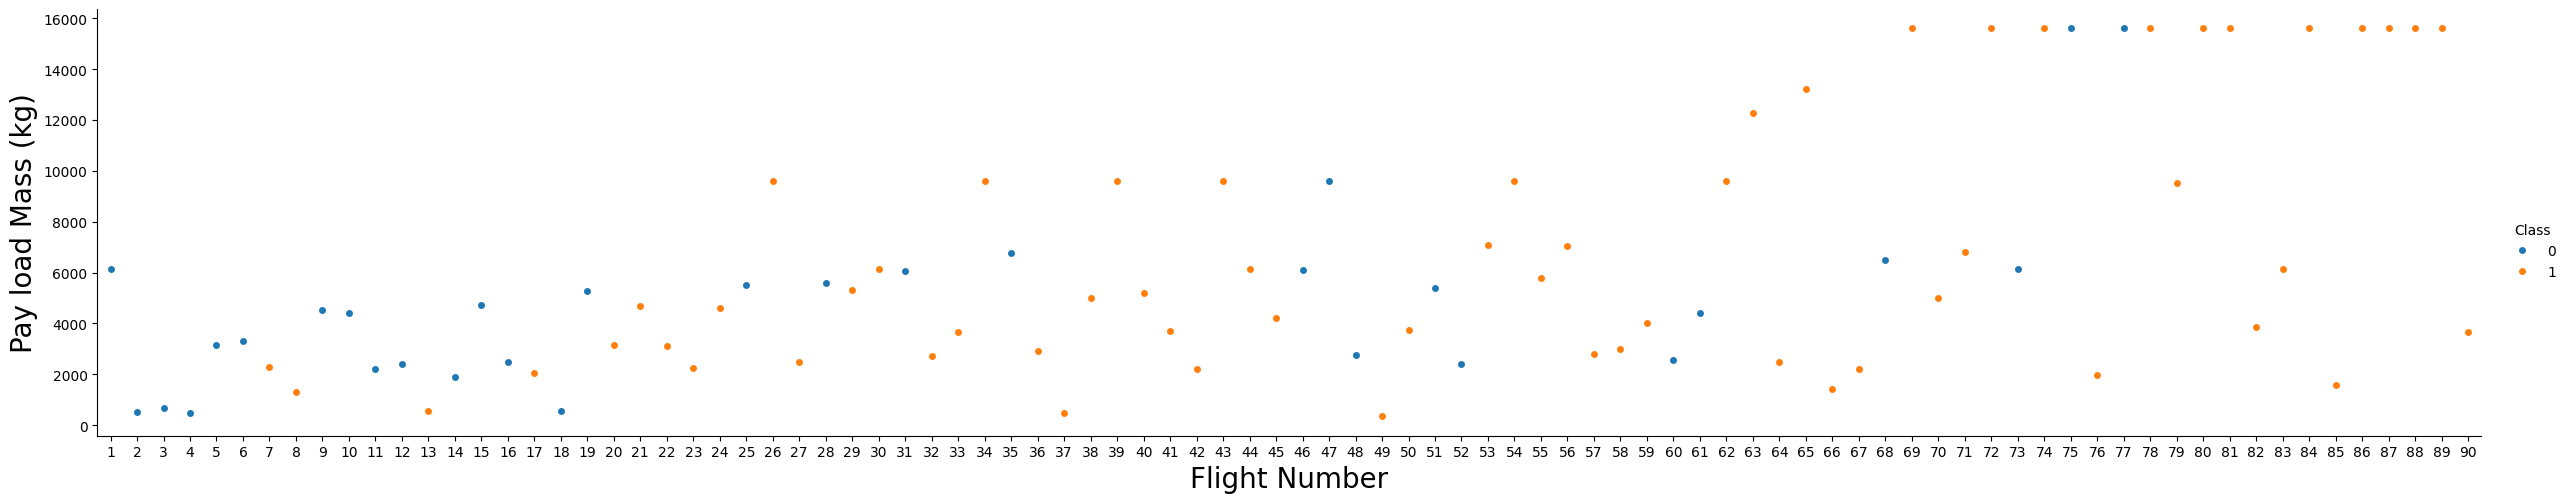

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

As the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

Different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

#### 3.1.2. Relationship between Flight Number and Launch Site

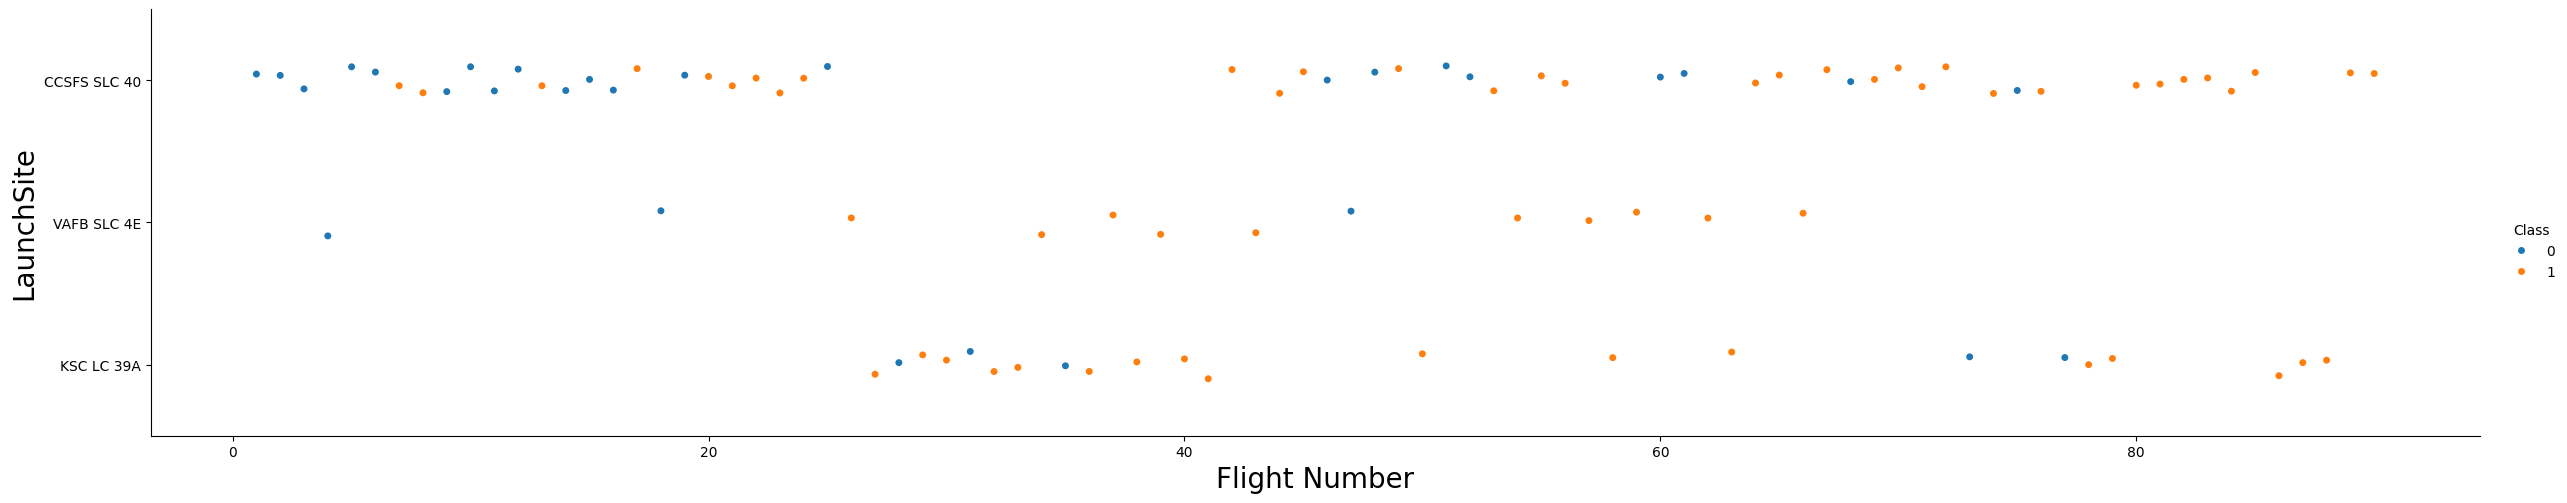

In [ ]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()


<code>From the plot above it can be conclused that:</code>

* CCAFS SLC 40 it is the most common launch site 
* The larger the flight amount at a launch site, the greater the success rate at  a launch site
* Launches have a 66.6% of success rate

#### 3.1.3. Relationship between Payload and Launch Site

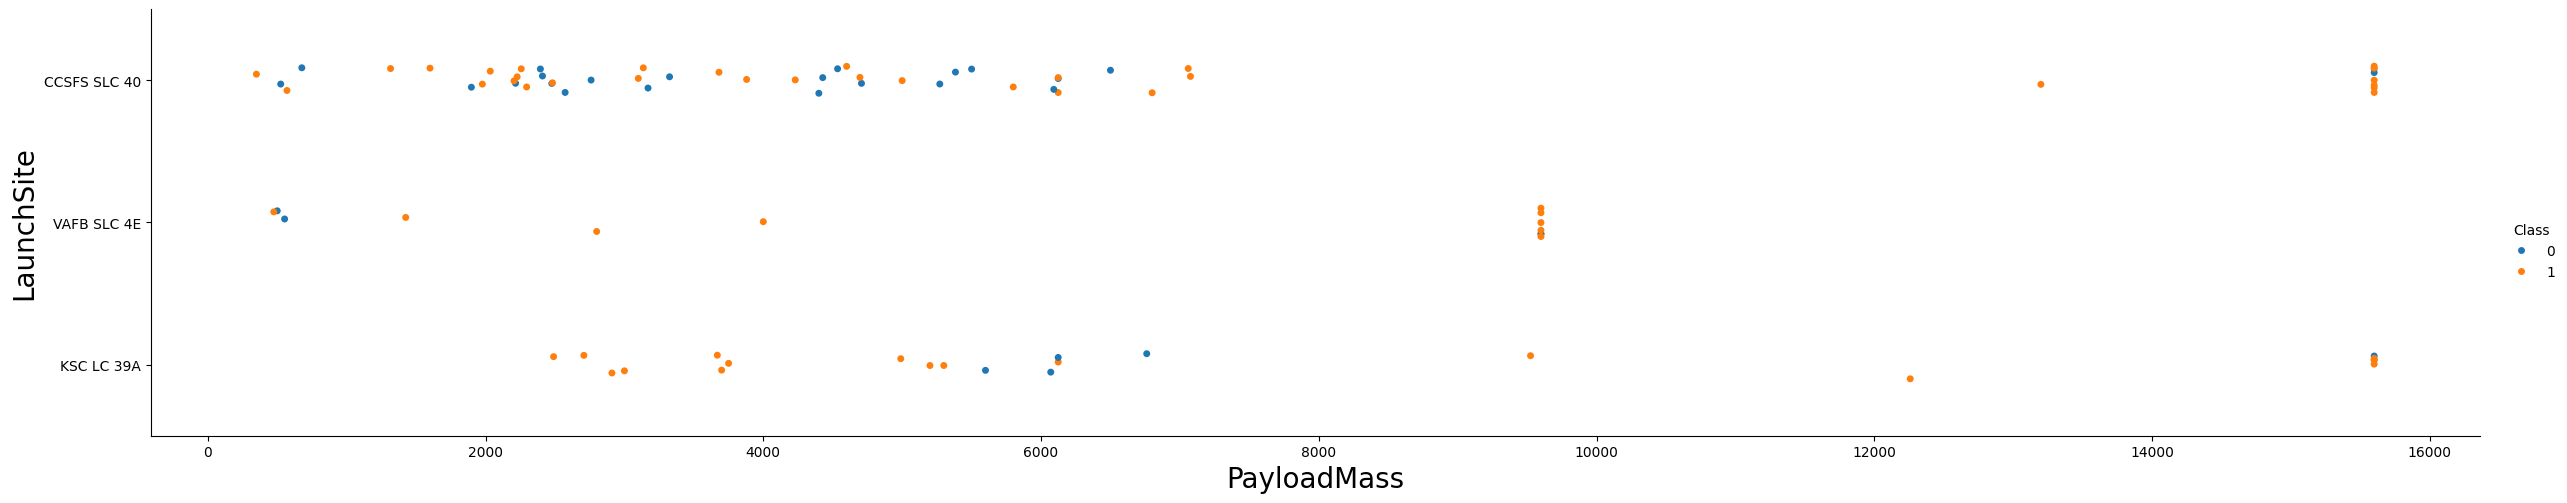

In [ ]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

<code>From the plot above it can be conclused that:</code>

* VAFB-SLC does not launch any heavy payloads
* The higher success rate was for the rockes
* The greater the payload mass was for a launch site CCAFS SLC 40

Most launches with payload mass under 10,000 kg are from any launch site, but heavier ones happens mainly at CCAFS SLC 40 and KSC LC 39A

### 3.1.4. Relationship between success rate of each orbit type

<Axes: xlabel='Orbit'>

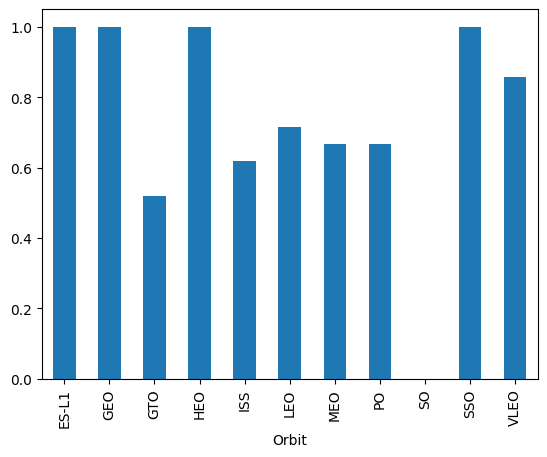

In [ ]:
df.groupby('Orbit')['Class'].mean().plot.bar()

<code>From the plot above it can be conclused that:</code>

* GEO, HEO, SSO, VLEO and ES-L1 had the most success rate by mean

#### 3.1.5. relationship between FlightNumber and Orbit type

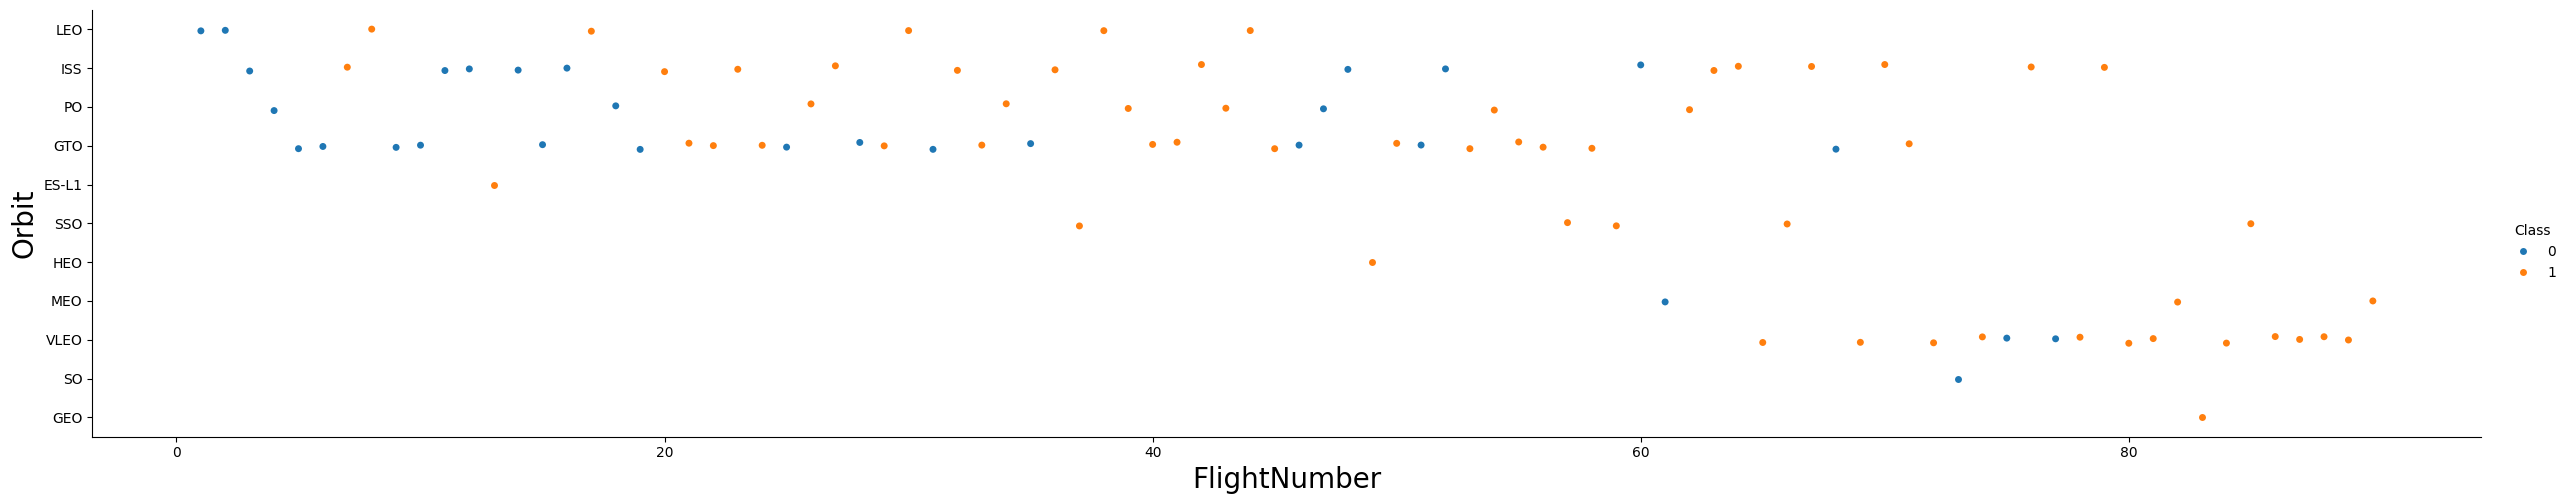

In [ ]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

<code>From the plot above it can be conclused that:</code>

* LEO orbit success apparently it is correlated to the number of flights, and 
* There is no relationship for GTO orbit

In the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

#### 3.1.6. Relationship between Payload and Orbit type

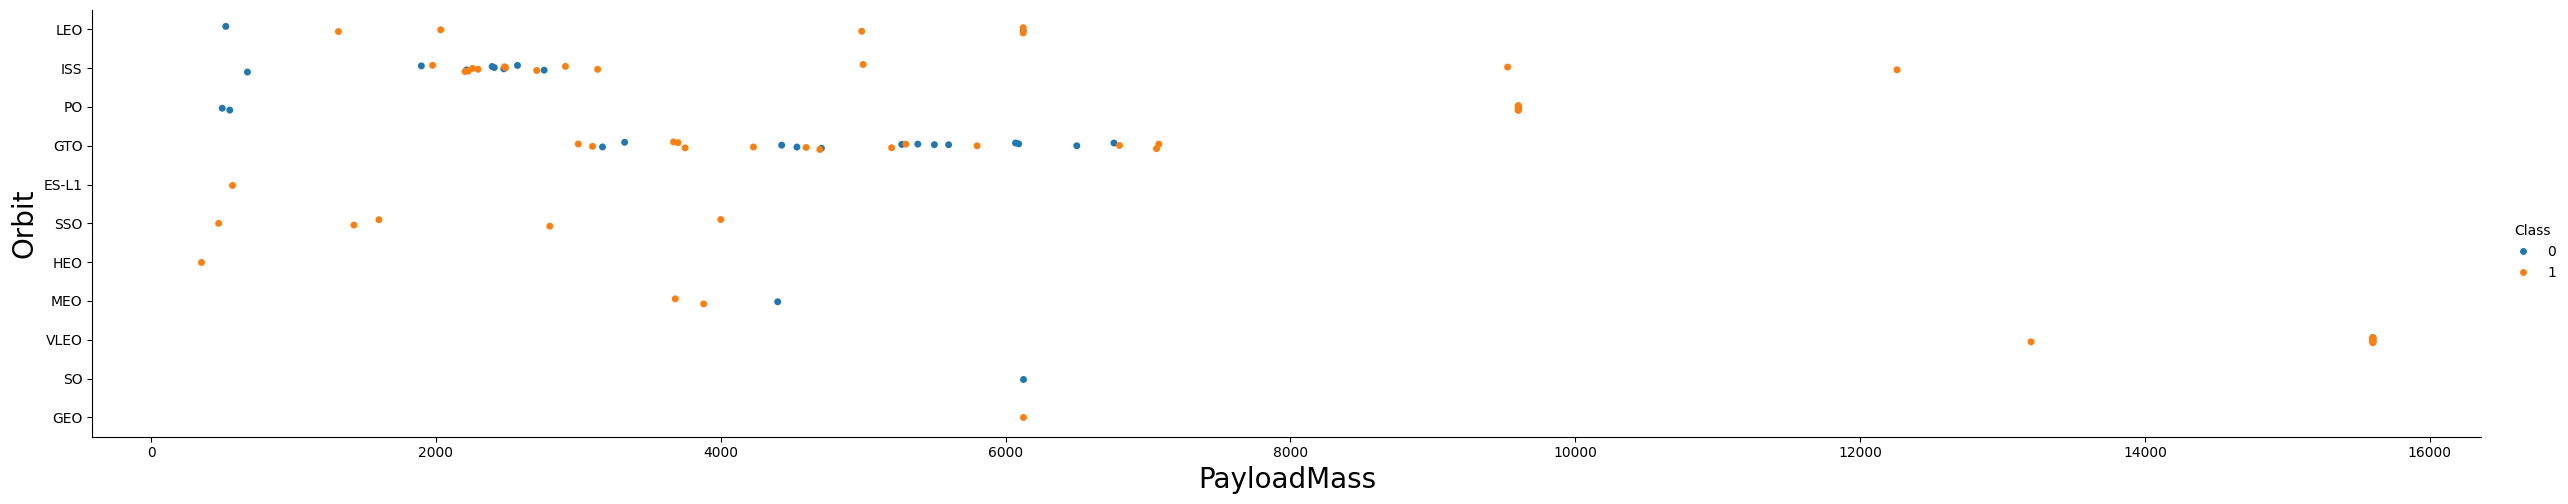

In [ ]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

<code>From the plot above it can be conclused that:</code>

* There is successfully heavy payloads for the Polar, LEO and ISS.

Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.

#### 3.1.7. Launch success yearly trend 
* Average launch success trend.

In [ ]:
# A function to Extract years from the date 
year=[]

def Extract_year(date_series):
    for date in date_series:
        # Check if the date is a valid string
        if isinstance(date, str):
            year.append(date.split("-")[0])
        else:
            # Handle missing or invalid values
            year.append(None)
    return year

print(Extract_year(df['Date']))

['2010', '2012', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020']


<Axes: xlabel='Year'>

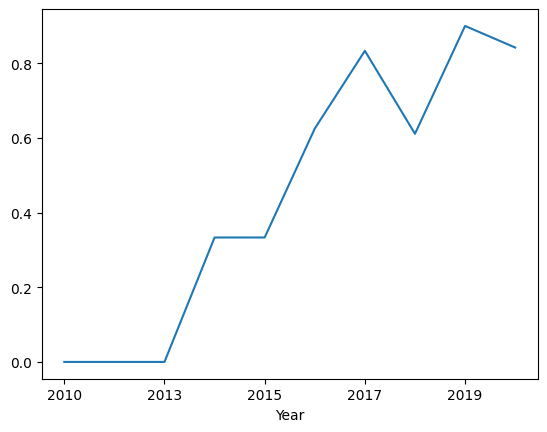

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
temp_df = df.copy()
temp_df['Year'] = year
temp_df.groupby('Year')['Class'].mean().plot()

<code>From the line chart above it can be seen that:</code>

* There is a significant improvement since 2014 and it was increasing until 2020.

#### 3.1.8. Features Engineering
* Preliminary insights about how each important variable would affect the success rate;
* Selection of the features that will be used in success prediction in the future module.

In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
pd.get_dummies(df, columns=['Orbit', 'LaunchSite','LandingPad', 'Serial'], drop_first=True)

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6123.547647,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,0,-120.610829,34.632093,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,True ASDS,2,True,True,True,5.0,12,

#### 3.1.9. Dummy variables creation to categorical columns

In [ ]:
features_one_hot = pd.get_dummies(df, columns=['Orbit', 'LaunchSite','LandingPad', 'Serial'], drop_first=False)
features_one_hot.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6123.547647,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,0,-120.610829,34.632093,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 3.1.10. Casting all numeric columns to float64

In [ ]:
features_one_hot = features_one_hot.astype('float64', errors='ignore')

In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

# 3.2. <code> **EDA With SQL**. </code>

#### <code>SQL queries performed:</code>

* It loaded the SpaceX dataset into a PostgreSQL database without leaving the Jupyter notebook. 
* It was applied EDA with SQL to get insight from the data, evaluating the relationship between the launch site, launch date, payload, booster type, and mission outcome
* It was written queries to find out for instance: 
    * the names of unique launch sites in the space mission; 
    * total payload mass carried by boosters launched by NASA (CRS); 
    * average payload mass carried by booster version F9 v1.1; 
    * total number of successful and failure mission outcomes and the failed landing outcomes in drone ship, their booster version and launch site names.


In [11]:
import mysql.connector

In [46]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)

# Displaying the name of the unique launch sites in the space mission

cursor = connection.cursor()
cursor.execute("SELECT DISTINCT LAUNCH_SITE FROM SPACEXTBL")
rows = cursor.fetchall()
for row in rows:
        print(row[0])

CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [44]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)

cursor = connection.cursor()
cursor.execute(
        "SELECT COUNT(*) LAUNCH_SITE FROM SPACEXTBL WHERE LAUNCH_SITE = 'CCAFS LC-40'"
        )
rows = cursor.fetchall()
for row in rows:
        print("Number of launches at CCAFS LC-40:", row[0])

Number of launches at CCAFS LC-40: 26


In [45]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)

cursor = connection.cursor()
cursor.execute(
        "SELECT COUNT(*) LAUNCH_SITE FROM SPACEXTBL WHERE LAUNCH_SITE = 'CCAFS SLC-40'"
        )
rows = cursor.fetchall()
for row in rows:
        print("Number of launches at CCAFS SLC-40:", row[0])

Number of launches at CCAFS SLC-40: 34


In [47]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)

# Displaying the records where launch sites begin with the string 'CCA'

cursor = connection.cursor()
cursor.execute(
        "SELECT LAUNCH_SITE FROM SPACEXTBL WHERE LAUNCH_SITE LIKE 'CCA%' LIMIT 5"
        )
rows = cursor.fetchall()
for row in rows:
        print(row[0])

CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40


In [50]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)

# Displaying the total payload mass carried by boosters launched by NASA (CRS)

cursor = connection.cursor()
cursor.execute(
        "SELECT SUM(PAYLOAD_MASS__KG_) FROM SPACEXTBL WHERE Customer = 'NASA (CRS)'"
        )
rows = cursor.fetchall()
for row in rows:
        print("Total payload mass carried by boosters launched by NASA (CRS):" ,row[0])

Total payload mass carried by boosters launched by NASA (CRS): 45596


In [27]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)

# Display average payload mass carried by booster version F9 v1.1
cursor = connection.cursor()
cursor.execute(
        "SELECT AVG(PAYLOAD_MASS__KG_) FROM SPACEXTBL WHERE Booster_Version LIKE 'F9 v1.0%'"
        )
rows = cursor.fetchall()
for row in rows:
        print("Average Payload Mass Carried by Booster Version F9 v1.1:", row[0], "kg")

Average Payload Mass Carried by Booster Version F9 v1.1: 340.4000 kg


In [32]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)
# Listing the date when the first successful landing outcome in 
#ground pad was acheived.

cursor = connection.cursor()
cursor.execute(
        "SELECT MIN(Date) FROM SPACEXTBL WHERE Landing_Outcome = 'Success (ground pad)'"
        )
rows = cursor.fetchall()
for row in rows:
        print("Date of first successful landing on ground pad:", row[0])

Date of first successful landing on ground pad: 2015-12-22


In [54]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)

""" Listing the names of the boosters which have success in drone ship and 
        have payload mass greater than 4000 but less than 6000 """

cursor = connection.cursor()
cursor.execute(
        "SELECT BOOSTER_VERSION FROM SPACEXTBL WHERE LANDING_OUTCOME = 'Success (drone ship)' AND 4000 < PAYLOAD_MASS__KG_ < 6000"
        )
rows = cursor.fetchall()
print("Names of the boosters which have success in drone ship and have payload mass > 4000 but < 6000:")
for row in rows:
        print(row[0])

Names of the boosters which have success in drone ship and have payload mass > 4000 but < 6000:
F9 FT B1021.1
F9 FT B1022
F9 FT B1023.1
F9 FT B1026
F9 FT B1029.1
F9 FT  B1021.2
F9 FT  B1029.2
F9 FT B1036.1
F9 FT B1038.1
F9 B4 B1041.1
F9 FT  B1031.2
F9 B4 B1042.1
F9 B4 B1045.1
F9 B5  B1046.1


In [55]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)

# Listing the total number of successful and failure mission outcomes
cursor = connection.cursor()
cursor.execute(
        "SELECT MISSION_OUTCOME, COUNT(MISSION_OUTCOME) AS TOTAL_NUMBER FROM SPACEXTBL GROUP BY MISSION_OUTCOME"
        )
rows = cursor.fetchall()
print("Total number of successful and failure mission outcomes:")
for row in rows:
        print(row)

Total number of successful and failure mission outcomes:
('Failure (in flight)', 1)
('Success', 99)
('Success (payload status unclear)', 1)


In [56]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)

""" Using a subquery to list the names of the booster_versions which have carried 
the maximum payload mass."""

cursor = connection.cursor()
cursor.execute(
        "SELECT DISTINCT BOOSTER_VERSION FROM SPACEXTBL WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTBL)"
        )
rows = cursor.fetchall()
print("Names of the booster_versions which have carried the maximum payload mass:")
for row in rows:
        print(row[0])

Names of the booster_versions which have carried the maximum payload mass:
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2 
F9 B5 B1058.3 
F9 B5 B1051.6
F9 B5 B1060.3
F9 B5 B1049.7 


In [58]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)
# Listing the failed landing_outcomes in drone ship, their booster versions, and launch site names for in year 2015
cursor = connection.cursor()
cursor.execute(
        "SELECT LANDING_OUTCOME, BOOSTER_VERSION, LAUNCH_SITE FROM SPACEXTBL WHERE Landing_Outcome = 'Failure (drone ship)' AND YEAR(DATE) = 2015"
        )
rows = cursor.fetchall()
print("Failed landing_outcomes in drone ship, their booster versions, and launch site names for in year 2015:")
for row in rows:
        print(row)

Failed landing_outcomes in drone ship, their booster versions, and launch site names for in year 2015:
('Failure (drone ship)', 'F9 v1.1 B1012', 'CCAFS LC-40')
('Failure (drone ship)', 'F9 v1.1 B1015', 'CCAFS LC-40')


In [59]:
connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
)

cursor = connection.cursor()
cursor.execute(
        "SELECT LANDING_OUTCOME, COUNT(LANDING_OUTCOME) AS TOTAL_NUMBER FROM SPACEXTBL WHERE DATE BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY LANDING_OUTCOME ORDER BY TOTAL_NUMBER DESC"
        )
rows = cursor.fetchall()
print("Count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order:")
for row in rows:
        print(row)

Count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order:
('No attempt', 10)
('Success (drone ship)', 5)
('Failure (drone ship)', 5)
('Success (ground pad)', 3)
('Controlled (ocean)', 3)
('Uncontrolled (ocean)', 2)
('Failure (parachute)', 2)
('Precluded (drone ship)', 1)


# 4. <code> **Web Scraping Falcon 9 and Falcon Heavy Launches Records from Wikipedia**. </code>

* Collected Falcon 9 historical launch records from the: 
[List of Falcon 9 and Falcon Heavy launches](https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01)

### Objective

* Web scrap Falcon 9 launch records with ***BeautifulSoup***:
     * Extract a Falcon 9 launch records HTML table from Wikipedia
     * Parse the table and convert it into a Pandas data frame

In [73]:
%pip install beautifulsoup4 requests

In [77]:
%pip install pyarrow

In [79]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pyarrow as pa

#### 4.1. Helper functions to process web scraped HTML table

In [80]:
# This function returns the data and time from the HTML  table cell
def date_time(table_cells):
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

In [81]:
# This function returns the booster version from the HTML  table cell 
def booster_version(table_cells):
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

In [82]:
# This function returns the landing status from the HTML table cell 
def landing_status(table_cells):
    out=[i for i in table_cells.strings][0]
    return out

In [83]:
def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass

In [84]:
# This function returns the landing status from the HTML table cell 
def extract_column_from_header(row):
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    

#### 4.2. Requesting the Falcon9 Launch Wiki page from its URL

In [85]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [86]:
response = requests.get(static_url)

In [87]:
# Creating a BeautifulSoup object from the HTML response
soup = BeautifulSoup(response.text, 'html')

In [88]:
# Printing the page title to verify if the BeautifulSoup object was created properly
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

#### 4.3. Extracting all column/variable names from the HTML table header
* collect all relevant column names from the HTML table header
* try to find all tables on the wiki page first. 

In [89]:
html_tables = soup.find_all('table')

In [91]:
#html_tables

The third table is my target table, it contains the actual launch records.

In [93]:
# Printing the third table to check its content
first_launch_table = html_tables[2]

In [ ]:
print(first_launch_table)

Iteration through the < th > elements and apply the provided extract_column_from_header() to extract column name one by one

In [95]:
column_names = []

tc = first_launch_table.find_all('th')
for th in tc:    
    name = extract_column_from_header(th)
    if name is not None and len(name) > 0:
            column_names.append(name)

In [96]:
column_names

['Flight No.',
 'Date and time ( )',
 'Launch site',
 'Payload',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launch outcome']

#### 4.4. Creating a data frame by parsing the launch HTML tables
* creating of an empty dictionary with keys from the extracted column names in the previous task. 
* Later, this dictionary will be converted into a Pandas dataframe

In [97]:
launch_dict= dict.fromkeys(column_names)

# Removing an irrelvant column
del launch_dict['Date and time ( )']


# Initializing the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []


# Adding some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

* Filling up the launch_dict with launch records extracted from table rows.

In [98]:
extracted_row = 0

for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
    for rows in table.find_all("tr"):
        # checking to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #geting table element 
        row=rows.find_all('td')
        # if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            launch_dict['Flight No.'].append(flight_number)
            datatimelist=date_time(row[0])

            # Date Value
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
            
            # Time value
            time = datatimelist[1]
            launch_dict['Time'].append(time)
              
            # Booster version
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            print(bv)
            launch_dict['Version Booster'].append(bv)

            # Launch Site
            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site)

            # Payload
            payload = row[3].a.string
            launch_dict['Payload'].append(payload)

            # Payload Mass
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)

            # Orbit
            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)

            # Customer
            if row[6].a != None:
                customer = row[6].a.string
            else:
                customer = ''
            launch_dict['Customer'].append(customer)

            # Launch outcome
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome)

             # Booster landing
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)

F9 v1.0B0003.1
F9 v1.0B0004.1
F9 v1.0B0005.1
F9 v1.0B0006.1
F9 v1.0B0007.1
F9 v1.1B1003
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 FT
F9 v1.1
F9 FT
F9 FT
F9 FT
F9 FT
F9 FT
F9 FT
F9 FT
F9 FT
F9 FT
F9 FT
F9 FT♺
F9 FT
F9 FT
F9 FT
F9 FTB1029.2
F9 FT
F9 FT
F9 B4
F9 FT
F9 B4
F9 B4
F9 FTB1031.2
F9 B4
F9 FTB1035.2
F9 FTB1036.2
F9 B4
F9 FTB1032.2
F9 FTB1038.2
F9 B4
F9 B4B1041.2
F9 B4B1039.2
F9 B4
F9 B5B1046.1
F9 B4B1043.2
F9 B4B1040.2
F9 B4B1045.2
F9 B5
F9 B5B1048
F9 B5B1046.2
F9 B5
F9 B5B1048.2
F9 B5B1047.2
F9 B5B1046.3
F9 B5
F9 B5
F9 B5B1049.2
F9 B5B1048.3
F9 B5[268]
F9 B5
F9 B5B1049.3
F9 B5B1051.2
F9 B5B1056.2
F9 B5B1047.3
F9 B5
F9 B5
F9 B5B1056.3
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5B1058.2
F9 B5
F9 B5B1049.6
F9 B5
F9 B5B1060.2
F9 B5B1058.3
F9 B5B1051.6
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5 ♺
F9 B5 ♺
F9 B5 ♺
F9 B5 ♺
F9 B5
F9 B5B1051.8
F9 B5B1058.5
F9 B5 ♺
F9 B5 ♺
F9 B5 ♺
F9 B5 ♺
F9 B5 ♺
F9 B5B1060.6
F9

In [99]:
for k in launch_dict.keys():
    print("Key {} => Len {}".format(k, len(k)))

Key Flight No. => Len 10
Key Launch site => Len 11
Key Payload => Len 7
Key Payload mass => Len 12
Key Orbit => Len 5
Key Customer => Len 8
Key Launch outcome => Len 14
Key Version Booster => Len 15
Key Booster landing => Len 15
Key Date => Len 4
Key Time => Len 4


In [100]:
launch_dict
df=pd.DataFrame(launch_dict)
df

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,F9 v1.0B0003.1,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.0B0004.1,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525 kg,LEO,NASA,Success,F9 v1.0B0005.1,No attempt\n,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success\n,F9 v1.0B0006.1,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,F9 v1.0B0007.1,No attempt\n,1 March 2013,15:10
...,...,...,...,...,...,...,...,...,...,...,...
116,117,CCSFS,Starlink,"15,600 kg",LEO,SpaceX,Success\n,F9 B5B1051.10,Success,9 May 2021,06:42
117,118,KSC,Starlink,"~14,000 kg",LEO,SpaceX,Success\n,F9 B5B1058.8,Success,15 May 2021,22:56
118,119,CCSFS,Starlink,"15,600 kg",LEO,SpaceX,Success\n,F9 B5B1063.2,Success,26 May 2021,18:59
119,120,KSC,SpaceX CRS-22,"3,328 kg",LEO,NASA,Success\n,F9 B5B1067.1,Success,3 June 2021,17:29


In [101]:
df.to_csv('spacex_web_scraped_tpf.csv', index=False)

# 5. <code> **Interactive Visual Analytics with Folium Lab**. </code>

![Image](images/launch.png)

* Marked all launch sites, and added map objects such as markers, circles, lines to mark the success or failure of launches for each site on the folium map. 
* Assigned the feature launch outcomes (failure or success) to class 0 and 1
    * 0 for failure, and 1 for success. 
* Used the color-labeled marker clusters, to identifie which launch sites have relatively high success rate.
* Calculated the distances between a launch site to its proximities. 
* provided answers to the following questions like: 
    * Are launch sites near railways, highways and coastlines?
    * Do launch sites keep certain distance away from cities?



* Results of launches with green and red markes showing the successful and failure respectively.

### Objectives:
* Mark all launch sites on a map
* Mark the success/failed launches for each site on the map
* Calculate the distances between a launch site to its proximities

In [135]:
import folium
import wget
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

In [136]:
from IPython.display import display, HTML

In [137]:
# This function is designed to display a Folium map in a DeepNote environment 
def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

#### 5.1. Marking all launch sites on a map

In [139]:
spacex_df = pd.read_csv('csv/spacex_launch_geo.csv')

In [140]:
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]

In [141]:
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610746


In [142]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [145]:
from IPython.display import IFrame

video_nasajsc = 'https://www.nasa.gov/wp-content/uploads/2023/08/2018m000898-giant-leaps-start-here-social-mp4large.mp4'

video_iframe = IFrame(video_nasajsc, width=560, height=315)

video_iframe

In [ ]:
# Creating a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Creating a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Creating an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html="<div style='font-size: 12; color:#d35400;'><b>%s</b></div>" % "NASA JSC",
        )
    ,parse_html=True
    )
site_map.add_child(circle)
site_map.add_child(marker)

folium_deepnote_show(site_map)

In [148]:
# Initializing the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

for ix, row in launch_sites_df.iterrows():
    ls_name = row['Launch Site']
    ls_lat  = row['Lat']
    ls_long = row['Long']
    
    print('{}\t{}\t{}'.format(ls_name, ls_lat, ls_long))
    
    coordinate = [ls_lat, ls_long]
    circle = folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(ls_name + ' region'))
    marker = folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % ls_name, ))
    
    site_map.add_child(circle)
    site_map.add_child(marker)
    
site_map

CCAFS LC-40	28.56230196799018	-80.57735647504778
CCAFS SLC-40	28.563197177407144	-80.57682003124195
KSC LC-39A	28.57325457037815	-80.64689528960382
VAFB SLC-4E	34.632834161782775	-120.61074553068327


#### 5.2. Marking the success/failed launches for each site on the map

In [149]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Creating markers for all launch records. 
* If a launch was successful (class=1), use a green marker and 
* If a launch was failed, use a red marker (class=0)

In [150]:
marker_cluster = MarkerCluster()

In [153]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


💡**Note:** A launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate.

To simplify a map containing many markers having the same coordinate I'm going to perform Marker clusters.

In [154]:
# Adding marker_cluster to current site_map
site_map.add_child(marker_cluster)

for index, record in spacex_df.iterrows():
    ls_name = record['Launch Site']
    ls_lat  = record['Lat']
    ls_long = record['Long']
    coordinate = [ls_lat, ls_long]
    
    marker = folium.map.Marker(coordinate, icon=folium.Icon(color='white', icon_color=record['marker_color'],icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % ls_name, ))
    marker_cluster.add_child(marker)

site_map

### 5.3.Calculating the distances between a launch site to its proximities

* Exploring and analyzing the proximities of launch sites.

In [155]:
# Adding Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [156]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [157]:
# finding coordinate of railway point
distance = calculate_distance(28.57468,-80.65229,28.573255 ,-80.646895)
distance

0.5503149993453544

In [158]:
# Creating and adding a folium.Marker on the selected closest railway point on the map
# Displaying the distance between railway point and launch site using the icon property 
coordinate = [28.57468,-80.65229]
distance_marker = folium.Marker(
    coordinate,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
    )
)
site_map.add_child(distance_marker)
site_map

In [159]:
# Creating a `folium.PolyLine` object using the railway point coordinate and launch site coordinate
coordinates=[[28.57468,-80.65229],[28.573255 ,-80.646895]]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

In [160]:
# Creating a marker with distance to a closest city, coastline, highway, etc.
# Drawing a line between the marker to the launch site
coordinates=[[28.52361, -80.64857],[28.573255 ,-80.646895]]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

distance_marker = folium.Marker(
    coordinates[0],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(calculate_distance(28.52361, -80.64857,28.573255 ,-80.646895)),
    )
)
site_map.add_child(distance_marker)

* Launch sites are in close proximity to coastline so they can fly over the ocean during launch, for at least two safety reasons
    * **1** crew has option to abort launch and attempt water landing 
    * **2** minimize people and property at risk from falling debris.

* Launch sites are in close proximity to highways, which allows for easily transport required people and property.
* Launch sites are in close proximity to railways, which allows transport for heavy cargo.

* Launch sites are in close proximity to equator to minimize fuel consumption by using Earth's ~ 30km/sec eastward spin to help spaceships get into orbit.

* Launch sites are not in close proximity to cities, which minimizes danger to population dense areas.

# 6. <code> **Dashboard with Plotly Dash**. </code>

![DB](images/dashboard.jpg)

* Built an interactive dashboard with Plotly dash.
* Plotted pie charts showing the total launches (successful and unsuccessful launches) by a certain sites. 
* Plotted scatter graph showing the relationship with Outcome and Payload Mass (Kg) for the different booster version. A scatterplot maps recovery outcome vs. payload mass


![Plot1](images/plot_1.png)

* **CCAFS SLC-40** had the least success percentage and CCAFSA LC-40 had the most


![Plot1](images/plot_2.png)

* **KSC LC-39A** had the most and the best sucess

![Plot1](images/plot_3.png)

# 7. <code> **Machine Learning Prediction**. </code>

![Image](images/predictiveA.jpg)

* For predictive analysis, the important libraries used was numpy and pandas.
* The machine learning models that was built to predict the best successful launches are:
    * Logistic Regression
    * K-Nearest Neighbor (KNN)
    * Decision Trees 
    * Support Vector Machine (SVM)

Each of these methods splits the data into testing and training sets, 
* Used accuracy as the metric for the model,
* improved the model using feature engineering and algorithm tuning. 


### Objectives:
* Perform exploratory Data Analysis and determine Training Labels
* Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
     * Find the method performs best using test data

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.
Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


***


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler


In [162]:
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [164]:
data = pd.read_csv('csv/dataset_part_2.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [165]:
X = pd.read_csv('csv/dataset_part_3.csv')
X.head(100)

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,2010-06-04,Falcon 9,6123.547647,None None,1.0,0.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2012-05-22,Falcon 9,525.000000,None None,1.0,0.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2013-03-01,Falcon 9,677.000000,None None,1.0,0.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2013-09-29,Falcon 9,500.000000,False Ocean,1.0,0.0,0.0,0.0,1.0,0.0,-120.610829,34.632093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2013-12-03,Falcon 9,3170.000000,None None,1.0,0.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,2020-09-03,Falcon 9,15600.000000,True ASDS,2.0,1.0,1.0,1.0,5.0,12.0,-80.603956,28.608058,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,2020-10-06,Falcon 9,15600.000000,True ASDS,3.0,1.0,1.0,1.0,5.0,13.0,-80.603956,28.608058,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.

In [166]:
# numpy array from the column class in data
Y = data['Class'].to_numpy()
type(Y)

numpy.ndarray

In [167]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [168]:
# standardizing the data in X
transform = preprocessing.StandardScaler()

In [ ]:
X = transform.fit(X).transform(X.astype(float))

In [ ]:
X[0:5]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

#### 7.1. Training and Testing


* Data split into training and testing data using the  function  <code>train_test_split</code>.   
* The training data is divided into validation data, a second set used for training  data; 
* Then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [172]:
Y_test.shape

(18,)

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 86) (72,)
Test set: (18, 86) (18,)



* Logistic regression object 
* GridSearchCV object  <code>logreg_cv</code> with cv = 10.  
* Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [174]:
label_encoder = LabelEncoder()
X_train_encoded = X_train.apply(label_encoder.fit_transform)

In [175]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [176]:
parameters = {
    'classifier__C': [0.01, 0.1, 1],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}

In [177]:
logreg_cv = GridSearchCV(estimator=pipeline, cv=10, param_grid=parameters)

In [178]:
logreg_cv.fit(X_train_encoded, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.01, 0.1, 1],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['lbfgs']})

In [ ]:
parameters ={"classifier__C":[0.01,0.1,1],'classifier__penalty':['l2'], 'classifier__solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(estimator=lr, cv=10, param_grid=parameters)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

* Output of the <code>GridSearchCV</code> object for logistic regression.

In [ ]:
# Displaying the best parameters  and the accuracy on the validation data.
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Calculateing the accuracy on the test data with the method <code>score</code>:


In [ ]:
print("accuracy :",logreg_cv.score(X_test, Y_test))

accuracy : 0.8333333333333334


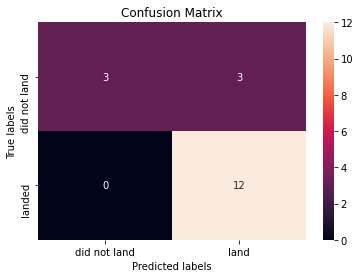

In [ ]:
# confusion matrix:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.

#### 7.2. Creating Support vector machine object
* <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  
* Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'classifier__C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


#### 7.3. Calculating the accuracy on the test data using the method <code>score</code>:


In [ ]:
print("accuracy :", svm_cv.score(X_test, Y_test))

accuracy : 0.8333333333333334


ploting the confusion matrix


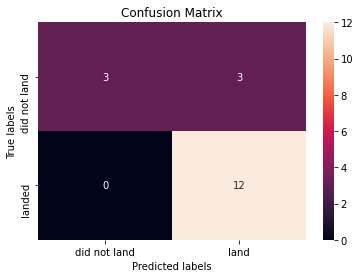

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

* This is a decision tree matrix that shows the different classes that the classifier can distinguish


* The problem is the unsuccessful landing marked as successful by the classifier because of the false positive problem

* It means that it does incorrectly assume 3 landings that are not accurate.


#### 7.4. Creating a decision tree classifier object
* creating a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  
* Fiting the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.875


#### 7.5. Calculating the accuracy of tree_cv on the test data using the method <code>score</code>:


In [ ]:
print("accuracy :", tree_cv.score(X_test, Y_test))

accuracy : 0.9444444444444444


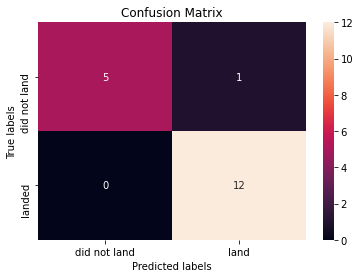

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Creating a k nearest neighbors object
* creating a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  
* Fiting the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(estimator=KNN, cv=10, param_grid=parameters)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Calculating the accuracy of tree_cv on the test data using the method <code>score</code>:


In [ ]:
print("accuracy :", knn_cv.score(X_test, Y_test))

accuracy : 0.8333333333333334


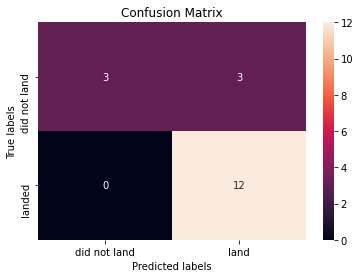

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### 7.6. Finding the method performs best:


In [ ]:
print("Model\t\tAccuracy\tTestAccuracy")#,logreg_cv.best_score_)
print("LogReg\t\t{}\t\t{}".format((logreg_cv.best_score_).round(5), logreg_cv.score(X_test, Y_test).round(5)))
print("SVM\t\t{}\t\t{}".format((svm_cv.best_score_).round(5), svm_cv.score(X_test, Y_test).round(5)))
print("Tree\t\t{}\t\t{}".format((tree_cv.best_score_).round(5), tree_cv.score(X_test, Y_test).round(5)))
print("KNN\t\t{}\t\t{}".format((knn_cv.best_score_).round(5), knn_cv.score(X_test, Y_test).round(5)))

comparison = {}

comparison['LogReg'] = {'Accuracy': logreg_cv.best_score_.round(5), 'TestAccuracy': logreg_cv.score(X_test, Y_test).round(5)}
comparison['SVM'] = {'Accuracy': svm_cv.best_score_.round(5), 'TestAccuracy': svm_cv.score(X_test, Y_test).round(5)}
comparison['Tree'] = {'Accuracy': tree_cv.best_score_.round(5), 'TestAccuracy': tree_cv.score(X_test, Y_test).round(5)}
comparison['KNN'] = {'Accuracy': knn_cv.best_score_.round(5), 'TestAccuracy': knn_cv.score(X_test, Y_test).round(5)}


Model		Accuracy	TestAccuracy
LogReg		0.84643		0.83333
SVM		0.84821		0.83333
Tree		0.875		0.94444
KNN		0.84821		0.83333


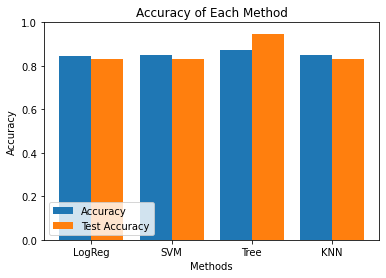

In [ ]:
x = []
y1 = []
y2 = []
for meth in comparison.keys():
    x.append(meth)    
    y1.append(comparison[meth]['Accuracy'])
    y2.append(comparison[meth]['TestAccuracy'])
    

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.4, label = 'Accuracy')
plt.bar(x_axis + 0.2, y2, 0.4, label = 'Test Accuracy')

plt.ylim([0,1])
plt.xticks(x_axis, x)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Accuracy of Each Method")
plt.legend(loc='lower left')
plt.show()
    

### <code>Conclusions</code>

After comparing accuracy of all methods used in the predictive analysis , it was conclused that, they all preformed practically the same, except for tree which fit train data slightly better but test data worse.

Decision Tree is the model that has the highest classification with 88.70% accuracy.


KSC LC39A had the most and the best success lunches of any site.


The first successful landing outcome on the ground pad was in  2015/12/22.


The larger the flight amount at a launch site, the greater the success rate at a launch site.


Payloads between 2,000 -4,000kg are the most successful



![BG](images/bg.jpg)

## Author


[Helena Pedro](https://www.linkedin.com/in/helena-mbeua-pedro/) 
- **Email:** mbeua94@gmail.com

Copyright © 2022
